In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [46]:
%matplotlib inline

In [47]:
vpp = pd.read_csv("D:\ML Project\Vehicle Performance Prediction\Dataset\data.csv")

In [48]:
vpp.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [49]:
vpp.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [50]:
vpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [51]:
vpp.isnull().any()

origin                 False
cylinders              False
displacement           False
horsepower             False
weight                 False
acceleration           False
year                   False
name                   False
Kilometer_per_liter    False
dtype: bool

In [52]:
vpp.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [53]:
x =vpp.iloc[:,4].values
y = vpp.iloc[:,8].values

In [54]:
x

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2130, 2264, 2228, 2046,
       2634, 3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746,
       5140, 2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613,
       1834, 1955, 2278, 2126, 2254, 2408, 2226, 4274, 4385, 4135, 4129,
       3672, 4633, 4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933,
       2511, 2979, 2189, 2395, 2288, 2506, 2164, 2100, 4100, 3672, 3988,
       4042, 3777, 4952, 4464, 4363, 4237, 4735, 4951, 3821, 3121, 3278,
       2945, 3021, 2904, 1950, 4997, 4906, 4654, 4499, 2789, 2279, 2401,
       2379, 2124, 2310, 2472, 2265, 4082, 4278, 1867, 2158, 2582, 2868,
       3399, 2660, 2807, 3664, 3102, 2875, 2901, 3336, 1950, 2451, 1836,
       2542, 3781, 3632, 3613, 4141, 4699, 4457, 4638, 4257, 2219, 1963,
       2300, 1649, 2003, 2125, 2108, 2246, 2489, 23

In [55]:
y

array([ 7.65258673,  6.37715561,  7.65258673,  6.80229932,  7.22744303,
        6.37715561,  5.9520119 ,  5.9520119 ,  5.9520119 ,  6.37715561,
        6.37715561,  5.9520119 ,  6.37715561,  5.9520119 , 10.20344898,
        9.35316156,  7.65258673,  8.92801786, 11.4788801 , 11.05373639,
       10.62859269, 10.20344898, 10.62859269, 11.05373639,  8.92801786,
        4.25143707,  4.25143707,  4.67658078,  3.82629337, 11.4788801 ,
       11.90402381, 10.62859269, 10.62859269,  8.07773044,  6.80229932,
        7.22744303,  8.07773044,  7.65258673,  5.9520119 ,  5.9520119 ,
        5.9520119 ,  5.9520119 ,  5.10172449,  5.5268682 ,  5.5268682 ,
        7.65258673,  9.35316156,  8.07773044,  7.65258673,  9.77830527,
       11.90402381, 12.75431122, 12.75431122, 13.17945493, 14.88002976,
       11.4788801 , 11.05373639, 10.20344898, 10.62859269,  9.77830527,
        8.50287415,  8.92801786,  5.5268682 ,  5.9520119 ,  6.37715561,
        5.9520119 ,  7.22744303,  4.67658078,  5.5268682 ,  5.10

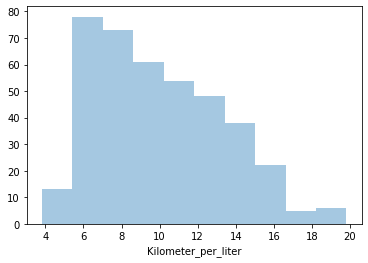

In [56]:
sns.distplot(vpp['Kilometer_per_liter'],kde =False,bins = 10)

<Figure size 3600x2160 with 0 Axes>

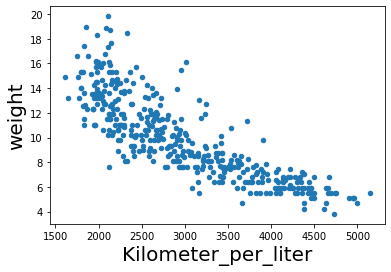

In [57]:

plt.figure(figsize=(50,30))
vpp.plot(y='Kilometer_per_liter',x='weight',kind ='scatter')
plt.xlabel('Kilometer_per_liter',fontsize=20)
plt.ylabel('weight',fontsize = 20)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.show()

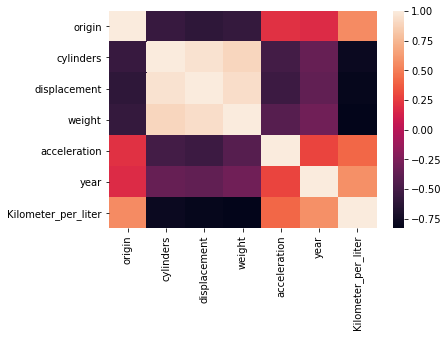

<Figure size 2160x1800 with 0 Axes>

<Figure size 2160x1800 with 0 Axes>

In [58]:
sns.heatmap(vpp.corr())
plt.show()
plt.figure(figsize=(30,25))

In [59]:
x1 = np.reshape(x,(-1,1))

In [60]:
x1.ndim

2

In [61]:
y1 = np.reshape(y,(-1,1))

In [62]:
y1.ndim

2

Split the Dataset into the Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size =0.2,random_state =100)

Fitting Simple Linear Regression to the Training set

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test Set Result

In [65]:
y1_pred = lr.predict(x1_test)
y1_pred

array([[12.0727463 ],
       [14.42118998],
       [ 9.97801261],
       [10.18943759],
       [11.08067522],
       [ 9.03147921],
       [ 9.51613033],
       [10.75540601],
       [ 6.47811594],
       [10.23497528],
       [ 9.96174915],
       [11.92637516],
       [ 9.15182882],
       [12.65823087],
       [13.30876929],
       [ 7.79220353],
       [ 6.85217552],
       [10.07234068],
       [11.89059555],
       [10.23172259],
       [13.32503275],
       [10.82045985],
       [12.30043475],
       [ 9.94223299],
       [ 7.17744473],
       [ 5.03717335],
       [10.51145411],
       [ 6.40655671],
       [11.35390135],
       [ 5.64217407],
       [12.95097316],
       [12.73954818],
       [ 6.98228321],
       [11.92962785],
       [11.38968097],
       [ 9.22664074],
       [ 5.94142174],
       [11.19451944],
       [ 5.59988908],
       [ 7.23924588],
       [ 4.2760434 ],
       [ 4.23050571],
       [ 7.36935356],
       [12.9347097 ],
       [ 6.99204128],
       [11

Visualising the Train set Results

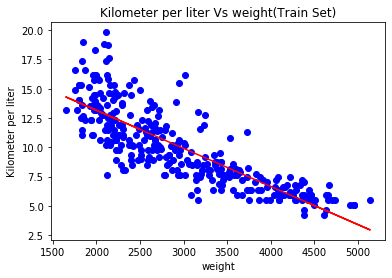

In [66]:
plt.scatter(x1_train,y1_train,color = 'blue')
plt.plot(x1_train,lr.predict(x1_train),color = 'red')
plt.title('Kilometer per liter Vs weight(Train Set)')
plt.xlabel('weight')
plt.ylabel('Kilometer per liter')
plt.show()


Visualising the Test set Results

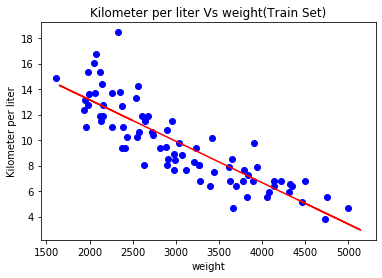

In [67]:
plt.scatter(x1_test,y1_test,color = 'blue')
plt.plot(x1_train,lr.predict(x1_train),color = 'red')
plt.title('Kilometer per liter Vs weight(Train Set)')
plt.xlabel('weight')
plt.ylabel('Kilometer per liter')
plt.show()

Finding the Residual

In [71]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y1_test,y1_pred))
print('MSE:',metrics.mean_squared_error(y1_test,y1_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y1_test,y1_pred)))
print('r_squared:', r2_score(y1_test, y1_pred))

MAE: 1.2638683678782523
MSE: 2.656300090929798
RMSE: 1.1242190035212234
r_squared: 0.7373187848436484


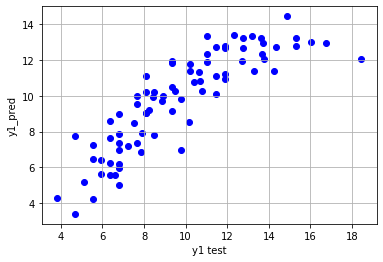

In [70]:
plt.scatter(y1_test,y1_pred,c='blue')
plt.xlabel('y1 test')
plt.ylabel('y1_pred')
plt.grid()